In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
dataset = cifar10.load_data()

In [ ]:
(trainx, trainy),(testx, testy) = cifar10.load_data()

In [ ]:
# automobile, cat, dog, and truck class is 1,3,5,9 on cifar 10
target = [1,3,5,9]
trainx_new = []
trainy_new = []
testx_new = []
testy_new = []


#remove unnecessary images for trainy
for i,j in enumerate(trainy):
  if j in target:
    trainx_new.append(trainx[i])
    trainy_new.append(trainy[i])

#remove unnecessary images for testy
for i,j in enumerate(testy):
  if j in target:
    testx_new.append(testx[i])
    testy_new.append(testy[i]) 

In [ ]:
# Turn training and testing data into numpy array
trainx_new = np.array(trainx_new)
trainy_new = np.array(trainy_new)
testx_new = np.array(testx_new)
testy_new = np.array(testy_new)

In [ ]:
from tensorflow.keras.utils import to_categorical
 #target coloumn apply to_catgorical
trainy_new = to_categorical(trainy_new)
testy_new = to_categorical(testy_new)

In [ ]:
# Define the model with the criteria
from tensorflow.keras import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow import keras
    
model=Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10,activation='softmax'))

In [ ]:
#Compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [ ]:
#Fit the model with the training data
model.fit(
    trainx_new,
    trainy_new, 
    epochs=15,
    validation_data= (testx_new,testy_new)
)

Epoch 1/15
625/625 [==============================] - 26s 39ms/step - loss: 0.9954 - accuracy: 0.5900 - val_loss: 0.8336 - val_accuracy: 0.6205
Epoch 2/15
625/625 [==============================] - 24s 38ms/step - loss: 0.6895 - accuracy: 0.6944 - val_loss: 0.6820 - val_accuracy: 0.6977
Epoch 3/15
625/625 [==============================] - 24s 39ms/step - loss: 0.6055 - accuracy: 0.7346 - val_loss: 0.9115 - val_accuracy: 0.6263
Epoch 4/15
625/625 [==============================] - 24s 38ms/step - loss: 0.5480 - accuracy: 0.7625 - val_loss: 0.8414 - val_accuracy: 0.6850
Epoch 5/15
625/625 [==============================] - 24s 38ms/step - loss: 0.5029 - accuracy: 0.7864 - val_loss: 0.7118 - val_accuracy: 0.6942
Epoch 6/15
625/625 [==============================] - 24s 38ms/step - loss: 0.4558 - accuracy: 0.8051 - val_loss: 0.5837 - val_accuracy: 0.7525
Epoch 7/15
625/625 [==============================] - 24s 39ms/step - loss: 0.4286 - accuracy: 0.8201 - val_loss: 0.5626 - val_accuracy:

In [ ]:
#show confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

predict_y = model.predict(testx, batch_size=64, verbose=1)
predict_y_indicator = np.argmax(predict_y, axis=1)

print(classification_report(testy, predict_y_indicator))

157/157 [==============================] - 3s 20ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.38      0.91      0.54      1000
           2       0.00      0.00      0.00      1000
           3       0.18      0.83      0.30      1000
           4       0.00      0.00      0.00      1000
           5       0.28      0.56      0.37      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.58      0.56      0.57      1000

    accuracy                           0.29     10000
   macro avg       0.14      0.29      0.18     10000
weighted avg       0.14      0.29      0.18     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Print confusion matrix vertically

Conf = confusion_matrix(testy, predict_y_indicator)
print(Conf)

[[  0 395   0 395   0  88   0   0   0 122]
 [  0 913   0  41   0  18   0   0   0  28]
 [  0  60   0 671   0 253   0   0   0  16]
 [  0  23   0 834   0 134   0   0   0   9]
 [  0  46   0 686   0 257   0   0   0  11]
 [  0   8   0 429   0 561   0   0   0   2]
 [  0  63   0 802   0 131   0   0   0   4]
 [  0  83   0 413   0 464   0   0   0  40]
 [  0 510   0 270   0  44   0   0   0 176]
 [  0 302   0  85   0  55   0   0   0 558]]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                        

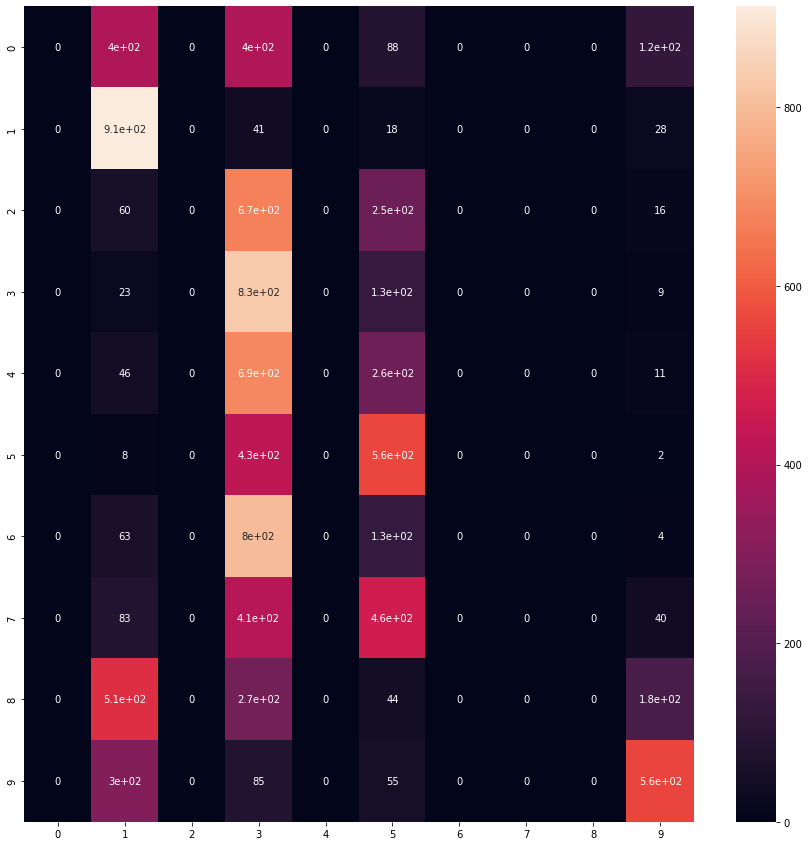

In [ ]:
# plot the confuson matrix
#Only shown class 1,3,5,9 because the other class isnt asked on the task
import seaborn as sns

fig= plt.figure(figsize=(15,15))
conf_matrix = Conf
sns.heatmap(data=conf_matrix,annot=True)
plt.show()
